In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
from util import HISTORICAL_RULES_FILE , RESOURCE_DIR, IMAGES_DIR 
#pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

This script analyse this association rules find in the last version

In [166]:
df = pd.read_excel(RESOURCE_DIR + os.sep + 'historical_rulesv10.xlsx', keep_default_na=False) #'seq_patterns/testes/historical_rules_commit10_197reg_021.xlsx'
#df = pd.read_excel(HISTORICAL_RULES_FILE , keep_default_na=False)
df2 = df.copy()
len(df)
#df.head()
df2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,frozenset({'Firebird'}),frozenset({'Informix'}),0.030769,0.035897,0.025641,0.833333,23.214286,0.024536,5.784615,1,1
1,frozenset({'Informix'}),frozenset({'Firebird'}),0.035897,0.030769,0.025641,0.714286,23.214286,0.024536,3.392308,1,1
2,frozenset({'SAP SQL Anywhere'}),frozenset({'SAP Adaptive Server'}),0.056410,0.051282,0.051282,0.909091,17.727273,0.048389,10.435897,1,1
3,frozenset({'SAP Adaptive Server'}),frozenset({'SAP SQL Anywhere'}),0.051282,0.056410,0.051282,1.000000,17.727273,0.048389,inf,1,1
4,frozenset({'SAP Adaptive Server'}),frozenset({'Informix'}),0.051282,0.035897,0.030769,0.600000,16.714286,0.028928,2.410256,1,1
...,...,...,...,...,...,...,...,...,...,...,...
323,frozenset({'Cassandra'}),frozenset({'H2'}),0.056410,0.338462,0.025641,0.454545,1.342975,0.006548,1.212821,1,1
324,frozenset({'MongoDB'}),frozenset({'SQLite'}),0.143590,0.133333,0.025641,0.178571,1.339286,0.006496,1.055072,1,1
325,frozenset({'SQLite'}),frozenset({'MongoDB'}),0.133333,0.143590,0.025641,0.192308,1.339286,0.006496,1.060317,1,1
326,frozenset({'Google Cloud Datastore'}),frozenset({'MySQL_Maria DB'}),0.087179,0.435897,0.046154,0.529412,1.214533,0.008153,1.198718,1,1


In [167]:
df['antecedents'] = df['antecedents'].astype(str)
df['consequents'] = df['consequents'].astype(str)

In [168]:
#Extract the word "frozenset" of the dataframe
df['antecedents'] = df['antecedents'].apply(lambda x: x[len('frozenset({"'):-3])
df['consequents'] = df['consequents'].apply(lambda x: x[len('frozenset({"'):-3])
df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Firebird,Informix,0.030769,0.035897,0.025641,0.833333,23.214286,0.024536,5.784615,1,1
1,Informix,Firebird,0.035897,0.030769,0.025641,0.714286,23.214286,0.024536,3.392308,1,1
2,SAP SQL Anywhere,SAP Adaptive Server,0.056410,0.051282,0.051282,0.909091,17.727273,0.048389,10.435897,1,1
3,SAP Adaptive Server,SAP SQL Anywhere,0.051282,0.056410,0.051282,1.000000,17.727273,0.048389,inf,1,1
4,SAP Adaptive Server,Informix,0.051282,0.035897,0.030769,0.600000,16.714286,0.028928,2.410256,1,1
...,...,...,...,...,...,...,...,...,...,...,...
323,Cassandra,H2,0.056410,0.338462,0.025641,0.454545,1.342975,0.006548,1.212821,1,1
324,MongoDB,SQLite,0.143590,0.133333,0.025641,0.178571,1.339286,0.006496,1.055072,1,1
325,SQLite,MongoDB,0.133333,0.143590,0.025641,0.192308,1.339286,0.006496,1.060317,1,1
326,Google Cloud Datastore,MySQL_Maria DB,0.087179,0.435897,0.046154,0.529412,1.214533,0.008153,1.198718,1,1


In [169]:
#Create a new columns
df.insert(3,'antecedent_sup_abs', 0, True)
df.insert(5,'consequent_sup_abs', 0, True)
df.insert(7,'support_abs', 0, True)

#Converting the support relative values in absolut values
df['antecedent_sup_abs'] = (df['antecedent support']*197)
df['consequent_sup_abs'] = (df['consequent support']*197)
df['support_abs'] = (df['support']*197)
df

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Firebird,Informix,0.030769,6.061538,0.035897,7.071795,0.025641,5.051282,0.833333,23.214286,0.024536,5.784615,1,1
1,Informix,Firebird,0.035897,7.071795,0.030769,6.061538,0.025641,5.051282,0.714286,23.214286,0.024536,3.392308,1,1
2,SAP SQL Anywhere,SAP Adaptive Server,0.056410,11.112821,0.051282,10.102564,0.051282,10.102564,0.909091,17.727273,0.048389,10.435897,1,1
3,SAP Adaptive Server,SAP SQL Anywhere,0.051282,10.102564,0.056410,11.112821,0.051282,10.102564,1.000000,17.727273,0.048389,inf,1,1
4,SAP Adaptive Server,Informix,0.051282,10.102564,0.035897,7.071795,0.030769,6.061538,0.600000,16.714286,0.028928,2.410256,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,Cassandra,H2,0.056410,11.112821,0.338462,66.676923,0.025641,5.051282,0.454545,1.342975,0.006548,1.212821,1,1
324,MongoDB,SQLite,0.143590,28.287179,0.133333,26.266667,0.025641,5.051282,0.178571,1.339286,0.006496,1.055072,1,1
325,SQLite,MongoDB,0.133333,26.266667,0.143590,28.287179,0.025641,5.051282,0.192308,1.339286,0.006496,1.060317,1,1
326,Google Cloud Datastore,MySQL_Maria DB,0.087179,17.174359,0.435897,85.871795,0.046154,9.092308,0.529412,1.214533,0.008153,1.198718,1,1


In [170]:
df2 = df.copy()
df2

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Firebird,Informix,0.030769,6.061538,0.035897,7.071795,0.025641,5.051282,0.833333,23.214286,0.024536,5.784615,1,1
1,Informix,Firebird,0.035897,7.071795,0.030769,6.061538,0.025641,5.051282,0.714286,23.214286,0.024536,3.392308,1,1
2,SAP SQL Anywhere,SAP Adaptive Server,0.056410,11.112821,0.051282,10.102564,0.051282,10.102564,0.909091,17.727273,0.048389,10.435897,1,1
3,SAP Adaptive Server,SAP SQL Anywhere,0.051282,10.102564,0.056410,11.112821,0.051282,10.102564,1.000000,17.727273,0.048389,inf,1,1
4,SAP Adaptive Server,Informix,0.051282,10.102564,0.035897,7.071795,0.030769,6.061538,0.600000,16.714286,0.028928,2.410256,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,Cassandra,H2,0.056410,11.112821,0.338462,66.676923,0.025641,5.051282,0.454545,1.342975,0.006548,1.212821,1,1
324,MongoDB,SQLite,0.143590,28.287179,0.133333,26.266667,0.025641,5.051282,0.178571,1.339286,0.006496,1.055072,1,1
325,SQLite,MongoDB,0.133333,26.266667,0.143590,28.287179,0.025641,5.051282,0.192308,1.339286,0.006496,1.060317,1,1
326,Google Cloud Datastore,MySQL_Maria DB,0.087179,17.174359,0.435897,85.871795,0.046154,9.092308,0.529412,1.214533,0.008153,1.198718,1,1


Top 10 BDs Session
Presentation of the 10 most frequent BDs (consequents=antecedents).

In [171]:
rules1b = df2.sort_values(['support',], ascending=[False])
rules1b

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
239,PostgreSQL_ CockroachDB,MySQL_Maria DB,0.338462,66.676923,0.435897,85.871795,0.282051,55.564103,0.833333,1.911765,0.134517,3.384615,1,1
238,MySQL_Maria DB,PostgreSQL_ CockroachDB,0.435897,85.871795,0.338462,66.676923,0.282051,55.564103,0.647059,1.911765,0.134517,1.874359,1,1
272,MySQL_Maria DB,H2,0.435897,85.871795,0.338462,66.676923,0.256410,50.512821,0.588235,1.737968,0.108876,1.606593,1,1
273,H2,MySQL_Maria DB,0.338462,66.676923,0.435897,85.871795,0.256410,50.512821,0.757576,1.737968,0.108876,2.326923,1,1
227,PostgreSQL_ CockroachDB,H2,0.338462,66.676923,0.338462,66.676923,0.225641,44.451282,0.666667,1.969697,0.111085,1.984615,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,MarkLogic,Oracle,0.025641,5.051282,0.261538,51.523077,0.025641,5.051282,1.000000,3.823529,0.018935,inf,1,1
95,Oracle,MarkLogic,0.261538,51.523077,0.025641,5.051282,0.025641,5.051282,0.098039,3.823529,0.018935,1.080268,1,1
96,SAP Adaptive Server,SQLite,0.051282,10.102564,0.133333,26.266667,0.025641,5.051282,0.500000,3.750000,0.018803,1.733333,1,1
97,SQLite,SAP Adaptive Server,0.133333,26.266667,0.051282,10.102564,0.025641,5.051282,0.192308,3.750000,0.018803,1.174603,1,1


In [172]:
rules1a = df2[(df2['antecedent support'] >= 0.07)] #& (df['confidence'] > 0.7) ]
#rules2 = rules2.sort_values(['consequent support','support'], ascending=[False,False])
rules1a = rules1a.groupby('antecedents').mean().sort_values(['antecedent support',], ascending=[False])
rules1a

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,,,,,,,,,,,,
MySQL_Maria DB,0.435897,85.871795,0.114103,22.478205,0.092094,18.142521,0.211275,1.989627,0.042357,1.165216,1.0,1.0
H2,0.338462,66.676923,0.122185,24.070457,0.077369,15.241695,0.228590,2.085037,0.036014,1.209825,1.0,1.0
PostgreSQL_ CockroachDB,0.338462,66.676923,0.118162,23.277991,0.083974,16.542949,0.248106,2.390544,0.043981,1.287619,1.0,1.0
Redis,0.302564,59.605128,0.147813,29.119155,0.077526,15.272700,0.256231,1.953654,0.032803,1.197552,1.0,1.0
Oracle,0.261538,51.523077,0.121368,23.909402,0.068590,13.512179,0.262255,2.689468,0.036847,1.278236,1.0,1.0
HyperSQL,0.194872,38.389744,0.153846,30.307692,0.063650,12.539065,0.326625,2.926410,0.033670,1.352586,1.0,1.0
MS SQL Server_Microsoft Azure SQL Database,0.174359,34.348718,0.125000,24.625000,0.058761,11.575855,0.337010,3.609563,0.036966,1.654256,1.0,1.0
MongoDB,0.143590,28.287179,0.169551,33.401603,0.053205,10.481410,0.370536,2.889840,0.028859,1.434575,1.0,1.0
SQLite,0.133333,26.266667,0.169231,33.338462,0.044970,8.859172,0.337278,2.887695,0.022406,1.325302,1.0,1.0


Top 10 BDs Session
Presentation of the 10 most frequent BDs (consequents=antecedents).

In [173]:
rules1 = df2[(df2['consequent support'] >= 0.13)] #0.07)] #& (df['confidence'] > 0.7) ]
#rules2 = rules2.sort_values(['consequent support','support'], ascending=[False,False])
rules1 = rules1.groupby('consequents').mean().sort_values(['consequent support',], ascending=[False])
rules1

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
consequents,,,,,,,,,,,,
MySQL_Maria DB,0.114103,22.478205,0.435897,85.871795,0.092094,18.142521,0.867273,1.989627,0.042357,NaN,1.0,1.0
H2,0.122185,24.070457,0.338462,66.676923,0.077369,15.241695,0.705705,2.085037,0.036014,NaN,1.0,1.0
PostgreSQL_ CockroachDB,0.118162,23.277991,0.338462,66.676923,0.083974,16.542949,0.809107,2.390544,0.043981,NaN,1.0,1.0
Redis,0.147813,29.119155,0.302564,59.605128,0.077526,15.272700,0.591106,1.953654,0.032803,NaN,1.0,1.0
Oracle,0.121368,23.909402,0.261538,51.523077,0.068590,13.512179,0.703399,2.689468,0.036847,NaN,1.0,1.0
HyperSQL,0.153846,30.307692,0.194872,38.389744,0.063650,12.539065,0.570275,2.926410,0.033670,NaN,1.0,1.0
MS SQL Server_Microsoft Azure SQL Database,0.125000,24.625000,0.174359,34.348718,0.058761,11.575855,0.629360,3.609563,0.036966,NaN,1.0,1.0
MongoDB,0.169551,33.401603,0.143590,28.287179,0.053205,10.481410,0.414951,2.889840,0.028859,NaN,1.0,1.0
SQLite,0.169231,33.338462,0.133333,26.266667,0.044970,8.859172,0.385026,2.887695,0.022406,1.749298,1.0,1.0


In [174]:
rules1c = df2.groupby(['antecedents','consequents']).mean().sort_values(['support','antecedent_sup_abs'], ascending=[False,False])

#sum().plot(kind='line')

#rules1c = rules1c[(rules1c['support'] >= 0.08)] 
rules1c

antecedent support  \
antecedents             consequents                                                      
MySQL_Maria DB          PostgreSQL_ CockroachDB                               0.435897   
PostgreSQL_ CockroachDB MySQL_Maria DB                                        0.338462   
MySQL_Maria DB          H2                                                    0.435897   
H2                      MySQL_Maria DB                                        0.338462   
                        PostgreSQL_ CockroachDB                               0.338462   
...                                                                                ...   
Influx DB               MySQL_Maria DB                                        0.025641   
                        Redis                                                 0.025641   
MarkLogic               MS SQL Server_Microsoft Azure SQL Database            0.025641   
                        Oracle                                                0.025641   
                        PostgreSQL_ CockroachDB                               0.025641   

                                                                    antecedent_sup_abs  \
antecedents             consequents                                                      
MySQL_Maria DB          PostgreSQL_ CockroachDB                              85.871795   
PostgreSQL_ CockroachDB MySQL_Maria DB                                       66.676923   
MySQL_Maria DB          H2                                                   85.871795   
H2                      MySQL_Maria DB                                       66.676923   
                        PostgreSQL_ CockroachDB                              66.676923   
...                                                                                ...   
Influx DB               MySQL_Maria DB                                        5.051282   
                        Redis                                                 5.051282   
MarkLogic               MS SQL Server_Microsoft Azure SQL Database            5.051282   
                        Oracle                                                5.051282   
                        PostgreSQL_ CockroachDB                               5.051282   

                                                                    consequent support  \
antecedents             consequents                                                      
MySQL_Maria DB          PostgreSQL_ CockroachDB                               0.338462   
PostgreSQL_ CockroachDB MySQL_Maria DB                                        0.435897   
MySQL_Maria DB          H2                                                    0.338462   
H2                      MySQL_Maria DB                                        0.435897   
                        PostgreSQL_ CockroachDB                               0.338462   
...                                                                                ...   
Influx DB               MySQL_Maria DB                                        0.435897   
                        Redis                                                 0.302564   
MarkLogic               MS SQL Server_Microsoft Azure SQL Database            0.174359   
                        Oracle                                                0.261538   
                        PostgreSQL_ CockroachDB                               0.338462   

                                                                    consequent_sup_abs  \
antecedents             consequents                                                      
MySQL_Maria DB          PostgreSQL_ CockroachDB                              66.676923   
PostgreSQL_ CockroachDB MySQL_Maria DB                                       85.871795   
MySQL_Maria DB          H2                                                   66.676923   
H2                      MySQL_Maria DB                                       85.871795   
               

In [175]:
# In this section we eliminate the inverted rules
#Always run this before reset.index()
#Used only for the correlation diagram
new_index = []

for index in rules1c.index:
    if index[::-1] in new_index:
        continue
    new_index.append(index)


len(new_index), len(rules1c.index)
rules1c = rules1c.loc[new_index,:]
rules1c

antecedent support  \
antecedents         consequents                                   
MySQL_Maria DB      PostgreSQL_ CockroachDB            0.435897   
                    H2                                 0.435897   
H2                  PostgreSQL_ CockroachDB            0.338462   
MySQL_Maria DB      Redis                              0.435897   
                    Oracle                             0.435897   
...                                                         ...   
SAP SQL Anywhere    Firebird                           0.056410   
ClickHouse          SapHana                            0.051282   
                    Snowflake                          0.051282   
SAP Adaptive Server Firebird                           0.051282   
Informix            Firebird                           0.035897   

                                             antecedent_sup_abs  \
antecedents         consequents                                   
MySQL_Maria DB      PostgreSQL_ CockroachDB           85.871795   
                    H2                                85.871795   
H2                  PostgreSQL_ CockroachDB           66.676923   
MySQL_Maria DB      Redis                             85.871795   
                    Oracle                            85.871795   
...                                                         ...   
SAP SQL Anywhere    Firebird                          11.112821   
ClickHouse          SapHana                           10.102564   
                    Snowflake                         10.102564   
SAP Adaptive Server Firebird                          10.102564   
Informix            Firebird                           7.071795   

                                             consequent support  \
antecedents         consequents                                   
MySQL_Maria DB      PostgreSQL_ CockroachDB            0.338462   
                    H2                                 0.338462   
H2                  PostgreSQL_ CockroachDB            0.338462   
MySQL_Maria DB      Redis                              0.302564   
                    Oracle                             0.261538   
...                                                         ...   
SAP SQL Anywhere    Firebird                           0.030769   
ClickHouse          SapHana                            0.030769   
                    Snowflake                          0.046154   
SAP Adaptive Server Firebird                           0.030769   
Informix            Firebird                           0.030769   

                                             consequent_sup_abs   support  \
antecedents         consequents                                             
MySQL_Maria DB      PostgreSQL_ CockroachDB           66.676923  0.282051   
                    H2                                66.676923  0.256410   
H2                  PostgreSQL_ CockroachDB           66.676923  0.225641   
MySQL_Maria DB      Redis                             59.605128  0.210256   
                    Oracle                            51.523077  0.200000   
...                                                         ...       ...   
SAP SQL Anywhere    Firebird                           6.061538  0.025641   
ClickHouse          SapHana                            6.061538  0.025641   
                    Snowflake                          9.092308  0.025641   
SAP Adaptive Server Firebird                           6.061538  0.025641   
Informix            Firebird                           6.061538  0.025641   

                                             support_abs  confidence  \
antecedents         consequents                                        
MySQL_Maria DB      PostgreSQL_ CockroachDB    55.564103    0.647059   
                    H2                         50.512821    0.588235   
H2                  PostgreSQL_ CockroachDB    44.451282    0.666667   
MySQL_Maria DB      Redis                      41.420513    0.48235

In [176]:
rules1c = rules1c.reset_index()
rules1c

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,MySQL_Maria DB,PostgreSQL_ CockroachDB,0.435897,85.871795,0.338462,66.676923,0.282051,55.564103,0.647059,1.911765,0.134517,1.874359,1.0,1.0
1,MySQL_Maria DB,H2,0.435897,85.871795,0.338462,66.676923,0.256410,50.512821,0.588235,1.737968,0.108876,1.606593,1.0,1.0
2,H2,PostgreSQL_ CockroachDB,0.338462,66.676923,0.338462,66.676923,0.225641,44.451282,0.666667,1.969697,0.111085,1.984615,1.0,1.0
3,MySQL_Maria DB,Redis,0.435897,85.871795,0.302564,59.605128,0.210256,41.420513,0.482353,1.594217,0.078369,1.347319,1.0,1.0
4,MySQL_Maria DB,Oracle,0.435897,85.871795,0.261538,51.523077,0.200000,39.400000,0.458824,1.754325,0.085996,1.364548,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,SAP SQL Anywhere,Firebird,0.056410,11.112821,0.030769,6.061538,0.025641,5.051282,0.454545,14.772727,0.023905,1.776923,1.0,1.0
160,ClickHouse,SapHana,0.051282,10.102564,0.030769,6.061538,0.025641,5.051282,0.500000,16.250000,0.024063,1.938462,1.0,1.0
161,ClickHouse,Snowflake,0.051282,10.102564,0.046154,9.092308,0.025641,5.051282,0.500000,10.833333,0.023274,1.907692,1.0,1.0
162,SAP Adaptive Server,Firebird,0.051282,10.102564,0.030769,6.061538,0.025641,5.051282,0.500000,16.250000,0.024063,1.938462,1.0,1.0


In [177]:
#if you need to generate the rules in excel
#rules_filter = rules1c.to_excel('rules_filtersv10.xlsx', index=False)

This chart shows all the rules for the BDs used together in last version.

In [178]:
#Graph generated with all rules without the support filter
import plotly.express as px 
#data = rules1c.sort_values(['support_abs'], ascending=[False])
rules1c['support_abs'] = rules1c['support_abs'].astype(int)
#df = px.data.gapminder('support_abs')
fig = px.scatter(rules1c.sort_values(['support_abs'], ascending=[False]), x="consequents", y="antecedents", 
size = "support_abs", color="support_abs", title='Correlation of the most frequent databases in last version',
hover_data=['support_abs'],color_continuous_scale = ["silver","gray"],width = 1000, height=1000, text='support_abs')
#fig.add_annotation(text= 'hover_data')
                  #xref="antecedent_support", yref="consequent_support",
                 #x=0.3, y=0.3, showarrow=False)
#fig.update_traces(textposition='inside')
#fig.title('Correlation of the most frequent databases')
fig.show()

In [179]:
#Test showing the rules without inverted repetitions and without the sort function
import plotly.express as px 
#rules1cd = rules1c[(rules1c['support'] >= 0.04) & (rules1c['support_abs'] != 0)] 
rules1c['support_abs'] = rules1c['support_abs'].astype(int)
#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#.sort_values(['support_abs'], ascending=[False])
fig = px.scatter(rules1c.sort_values(['support_abs'], ascending=[False]), x="consequents", y="antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the last version',
hover_data=['support_abs'], color_continuous_scale = ["silver","gray"], width = 1000, height=1000, text='support_abs')
#fig.title('Correlation of the most frequent databases')
fig.show()

In [180]:
#In this section the dataframe is ordered
orules1c = rules1c.sort_values(['support_abs'], ascending=[False])

order = {}
current = 1
for index, row in orules1c.iterrows():
    if row['antecedents'] not in order:
        order[row['antecedents']] = current
        current += 1
for index, row in orules1c.iterrows():
    if row['consequents'] not in order:
        order[row['consequents']] = current
        current += 1
#function ordering
def order_fn(x):
    if x.name == 'support_abs':
        return x
    return x.apply(lambda element: order[element])

orules1c = orules1c.sort_values(by=['antecedents', 'consequents', 'support_abs'], key=order_fn)

orules1c['consequents'] = pd.Categorical(orules1c['consequents'], order.keys())
orules1c['antecedents'] = pd.Categorical(orules1c['antecedents'], order.keys())
orules1c
order

{'MySQL_Maria DB': 1,
 'H2': 2,
 'PostgreSQL_ CockroachDB': 3,
 'Oracle': 4,
 'Redis': 5,
 'HyperSQL': 6,
 'MS SQL Server_Microsoft Azure SQL Database': 7,
 'SAP SQL Anywhere': 8,
 'IBM DB2': 9,
 'MongoDB': 10,
 'SQLite': 11,
 'SAP Adaptive Server': 12,
 'DynamoDB': 13,
 'ClickHouse': 14,
 'HBase': 15,
 'Informix': 16,
 'Cassandra': 17,
 'Google Cloud Datastore': 18,
 'Snowflake': 19,
 'Hazelcast': 20,
 'PostGIS': 21,
 'Firebird': 22,
 'MS Access': 23,
 'SapHana': 24,
 'Influx DB': 25,
 'MarkLogic': 26}

In [181]:
#if you need to generate the rules in excel
#rules_filter = orules1c.to_excel('rules_filtersv10_order.xlsx', index=False)

In [182]:
orules1c = orules1c.set_index(['antecedents','consequents'])
orules1c

antecedent support  \
antecedents    consequents                                   
MySQL_Maria DB H2                                 0.435897   
               PostgreSQL_ CockroachDB            0.435897   
               Oracle                             0.435897   
               Redis                              0.435897   
               HyperSQL                           0.435897   
...                                                    ...   
DynamoDB       Snowflake                          0.092308   
ClickHouse     Snowflake                          0.051282   
               SapHana                            0.051282   
HBase          Cassandra                          0.061538   
Informix       Firebird                           0.035897   

                                        antecedent_sup_abs  \
antecedents    consequents                                   
MySQL_Maria DB H2                                85.871795   
               PostgreSQL_ CockroachDB           85.871795   
               Oracle                            85.871795   
               Redis                             85.871795   
               HyperSQL                          85.871795   
...                                                    ...   
DynamoDB       Snowflake                         18.184615   
ClickHouse     Snowflake                         10.102564   
               SapHana                           10.102564   
HBase          Cassandra                         12.123077   
Informix       Firebird                           7.071795   

                                        consequent support  \
antecedents    consequents                                   
MySQL_Maria DB H2                                 0.338462   
               PostgreSQL_ CockroachDB            0.338462   
               Oracle                             0.261538   
               Redis                              0.302564   
               HyperSQL                           0.194872   
...                                                    ...   
DynamoDB       Snowflake                          0.046154   
ClickHouse     Snowflake                          0.046154   
               SapHana                            0.030769   
HBase          Cassandra                          0.056410   
Informix       Firebird                           0.030769   

                                        consequent_sup_abs   support  \
antecedents    consequents                                             
MySQL_Maria DB H2                                66.676923  0.256410   
               PostgreSQL_ CockroachDB           66.676923  0.282051   
               Oracle                            51.523077  0.200000   
               Redis                             59.605128  0.210256   
               HyperSQL                          38.389744  0.153846   
...                                                    ...       ...   
DynamoDB       Snowflake                          9.092308  0.025641   
ClickHouse     Snowflake                          9.092308  0.025641   
               SapHana                            6.061538  0.025641   
HBase          Cassandra                         11.112821  0.025641   
Informix       Firebird                           6.061538  0.025641   

                                        support_abs  confidence       lift  \
antecedents    consequents                                                   
MySQL_Maria DB H2                                50    0.588235   1.737968   
               PostgreSQL_ CockroachDB           55    0.647059   1.911765   
               Oracle                            39    0.458824   1.754325   
               Redis                             41    0.482353   1.594217   
               HyperSQL                          30    0.352941   1.811146   
...                                             ...         ...        ...   
DynamoDB       Snowflake                          5    0.2

In [183]:
orules1c.dtypes

antecedent support    float64
antecedent_sup_abs    float64
consequent support    float64
consequent_sup_abs    float64
support               float64
support_abs             int64
confidence            float64
lift                  float64
leverage              float64
conviction            float64
antecedent_len        float64
consequente_len       float64
dtype: object

In [184]:
#Removing after ordination
#orules1c['support_abs'] = orules1c['support_abs'].astype(int)
# In this section we eliminate the inverted rules
#Always run this for before reset.index()
new_index = []

for index in orules1c.index:
    if index[::-1] in new_index:
        continue
    new_index.append(index)


len(new_index), len(orules1c.index)
orules1c = orules1c.loc[new_index,:]
orules1c

antecedent support  \
antecedents    consequents                                   
MySQL_Maria DB H2                                 0.435897   
               PostgreSQL_ CockroachDB            0.435897   
               Oracle                             0.435897   
               Redis                              0.435897   
               HyperSQL                           0.435897   
...                                                    ...   
DynamoDB       Snowflake                          0.092308   
ClickHouse     Snowflake                          0.051282   
               SapHana                            0.051282   
HBase          Cassandra                          0.061538   
Informix       Firebird                           0.035897   

                                        antecedent_sup_abs  \
antecedents    consequents                                   
MySQL_Maria DB H2                                85.871795   
               PostgreSQL_ CockroachDB           85.871795   
               Oracle                            85.871795   
               Redis                             85.871795   
               HyperSQL                          85.871795   
...                                                    ...   
DynamoDB       Snowflake                         18.184615   
ClickHouse     Snowflake                         10.102564   
               SapHana                           10.102564   
HBase          Cassandra                         12.123077   
Informix       Firebird                           7.071795   

                                        consequent support  \
antecedents    consequents                                   
MySQL_Maria DB H2                                 0.338462   
               PostgreSQL_ CockroachDB            0.338462   
               Oracle                             0.261538   
               Redis                              0.302564   
               HyperSQL                           0.194872   
...                                                    ...   
DynamoDB       Snowflake                          0.046154   
ClickHouse     Snowflake                          0.046154   
               SapHana                            0.030769   
HBase          Cassandra                          0.056410   
Informix       Firebird                           0.030769   

                                        consequent_sup_abs   support  \
antecedents    consequents                                             
MySQL_Maria DB H2                                66.676923  0.256410   
               PostgreSQL_ CockroachDB           66.676923  0.282051   
               Oracle                            51.523077  0.200000   
               Redis                             59.605128  0.210256   
               HyperSQL                          38.389744  0.153846   
...                                                    ...       ...   
DynamoDB       Snowflake                          9.092308  0.025641   
ClickHouse     Snowflake                          9.092308  0.025641   
               SapHana                            6.061538  0.025641   
HBase          Cassandra                         11.112821  0.025641   
Informix       Firebird                           6.061538  0.025641   

                                        support_abs  confidence       lift  \
antecedents    consequents                                                   
MySQL_Maria DB H2                                50    0.588235   1.737968   
               PostgreSQL_ CockroachDB           55    0.647059   1.911765   
               Oracle                            39    0.458824   1.754325   
               Redis                             41    0.482353   1.594217   
               HyperSQL                          30    0.352941   1.811146   
...                                             ...         ...        ...   
DynamoDB       Snowflake                          5    0.2

In [185]:
orules1c = orules1c.reset_index()
orules1c = orules1c.rename(columns={"consequents": "Consequents", "antecedents": "Antecedents"})
orules1c


,Antecedents,Consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,MySQL_Maria DB,H2,0.435897,85.871795,0.338462,66.676923,0.256410,50,0.588235,1.737968,0.108876,1.606593,1.0,1.0
1,MySQL_Maria DB,PostgreSQL_ CockroachDB,0.435897,85.871795,0.338462,66.676923,0.282051,55,0.647059,1.911765,0.134517,1.874359,1.0,1.0
2,MySQL_Maria DB,Oracle,0.435897,85.871795,0.261538,51.523077,0.200000,39,0.458824,1.754325,0.085996,1.364548,1.0,1.0
3,MySQL_Maria DB,Redis,0.435897,85.871795,0.302564,59.605128,0.210256,41,0.482353,1.594217,0.078369,1.347319,1.0,1.0
4,MySQL_Maria DB,HyperSQL,0.435897,85.871795,0.194872,38.389744,0.153846,30,0.352941,1.811146,0.068902,1.244289,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,DynamoDB,Snowflake,0.092308,18.184615,0.046154,9.092308,0.025641,5,0.277778,6.018519,0.021381,1.320710,1.0,1.0
160,ClickHouse,Snowflake,0.051282,10.102564,0.046154,9.092308,0.025641,5,0.500000,10.833333,0.023274,1.907692,1.0,1.0
161,ClickHouse,SapHana,0.051282,10.102564,0.030769,6.061538,0.025641,5,0.500000,16.250000,0.024063,1.938462,1.0,1.0
162,HBase,Cassandra,0.061538,12.123077,0.056410,11.112821,0.025641,5,0.416667,7.386364,0.022170,1.617582,1.0,1.0


In [186]:
#Test showing the rules without inverted repetitions and with the sort function
import plotly.express as px 
#rules1cd = rules1c[(rules1c['support'] >= 0.04) & (rules1c['support_abs'] != 0)] 
orules1c['support_abs'] = orules1c['support_abs'].astype(int)
#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#.sort_values(['support_abs'], ascending=[False])
fig = px.scatter(orules1c.sort_values(['support_abs'], ascending=[False]), x="Consequents", y="Antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the last version',
hover_data=['support_abs'], color_continuous_scale = ["silver","gray"],width = 800, height=800,text='support_abs') 
#fig.title('Correlation of the most frequent databases')
fig.show()

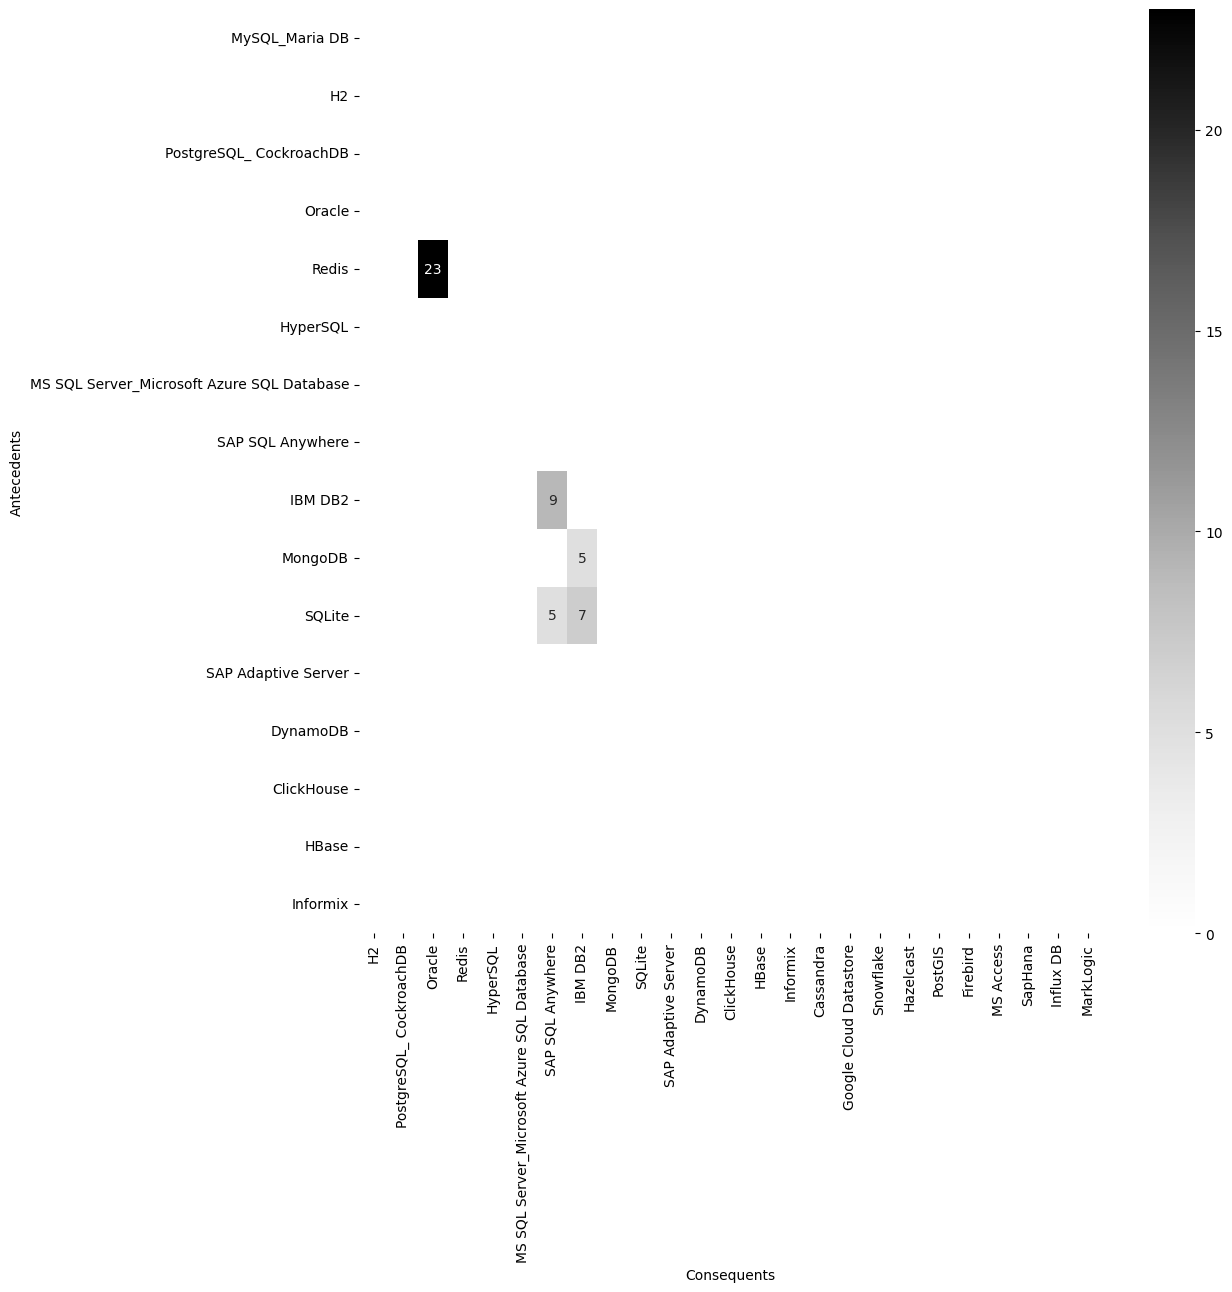

In [187]:
#Generating a heatmap without repetitions, with function ordering, following the tip:
# generate the complete heatmap with the y axis inverted and
# use the parameter mask=np.triu(np.ones_like(df)) in sns.heatmap
import seaborn as sns

pivot = orules1c.pivot(index='Antecedents', columns='Consequents', values='support_abs')
#pivot = pivot.iloc[::-1]
sns.heatmap(pivot, xticklabels=True, yticklabels=True, vmin=0, annot=True, cmap=sns.color_palette("Greys", as_cmap=True),
    mask=np.triu(np.ones_like(pivot, dtype=bool)))
fig = plt.gcf()
fig.set_size_inches(12, 12)

In [188]:
lista = []
lista = orules1c['Antecedents'].drop_duplicates()
lista

0                                  MySQL_Maria DB
24                                             H2
46                        PostgreSQL_ CockroachDB
68                                         Oracle
88                                          Redis
102                                      HyperSQL
114    MS SQL Server_Microsoft Azure SQL Database
132                              SAP SQL Anywhere
135                                       IBM DB2
142                                       MongoDB
151                                        SQLite
157                           SAP Adaptive Server
159                                      DynamoDB
160                                    ClickHouse
162                                         HBase
163                                      Informix
Name: Antecedents, dtype: category
Categories (26, object): ['MySQL_Maria DB', 'H2', 'PostgreSQL_ CockroachDB', 'Oracle', ..., 'MS Access', 'SapHana', 'Influx DB', 'MarkLogic']

In [189]:
pivot = orules1c.pivot(index='Antecedents', columns='Consequents', values='support_abs')

In [190]:
pivot = pivot.reset_index()

In [191]:
pivot

Consequents,Antecedents,H2,PostgreSQL_ CockroachDB,Oracle,Redis,HyperSQL,MS SQL Server_Microsoft Azure SQL Database,SAP SQL Anywhere,IBM DB2,MongoDB,...,Cassandra,Google Cloud Datastore,Snowflake,Hazelcast,PostGIS,Firebird,MS Access,SapHana,Influx DB,MarkLogic
0,MySQL_Maria DB,50.0,55.0,39.0,41.0,30.0,31.0,11.0,17.0,22.0,...,9.0,9.0,9.0,8.0,7.0,6.0,6.0,6.0,5.0,NaN
1,H2,NaN,44.0,31.0,32.0,22.0,23.0,10.0,15.0,18.0,...,5.0,8.0,6.0,8.0,7.0,6.0,5.0,6.0,NaN,NaN
2,PostgreSQL_ CockroachDB,NaN,NaN,36.0,34.0,23.0,28.0,11.0,18.0,17.0,...,9.0,10.0,8.0,8.0,7.0,6.0,6.0,6.0,NaN,5.0
3,Oracle,NaN,NaN,NaN,NaN,20.0,24.0,11.0,16.0,14.0,...,6.0,8.0,7.0,6.0,6.0,6.0,6.0,6.0,NaN,5.0
4,Redis,NaN,NaN,23.0,NaN,16.0,20.0,5.0,8.0,18.0,...,10.0,9.0,NaN,6.0,5.0,NaN,NaN,NaN,5.0,NaN
5,HyperSQL,NaN,NaN,NaN,NaN,NaN,16.0,10.0,13.0,9.0,...,NaN,5.0,NaN,6.0,5.0,6.0,6.0,NaN,NaN,NaN
6,MS SQL Server_Microsoft Azure SQL Database,NaN,NaN,NaN,NaN,NaN,NaN,11.0,15.0,11.0,...,5.0,5.0,7.0,5.0,5.0,6.0,5.0,6.0,NaN,5.0
7,SAP SQL Anywhere,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
8,IBM DB2,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,...,NaN,NaN,6.0,NaN,NaN,6.0,NaN,5.0,NaN,NaN
9,MongoDB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,8.0,6.0,NaN,8.0,NaN,NaN,NaN,NaN,5.0,NaN


In [192]:
#Test generating the graph with all the rules ordered with the sort function
import plotly.express as px 
#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#rules1c = rules1c.sort_values(['support_abs'], ascending=[False])
orules1c['support_abs'] = orules1c['support_abs'].astype(int)
fig = px.scatter(orules1c, x="Consequents", y="Antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the last version',
hover_data=['support_abs'], color_continuous_scale = ["silver", "gray"], width=1000, height=1000, text= 'support_abs') 
#fig.title('Correlation of the most frequent databases')
fig.show()

In [193]:
#Test sorting only by support, after the sort function
orules1cd = orules1c.sort_values(by=['support_abs'], ascending=False)
orules1cd

,Antecedents,Consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
1,MySQL_Maria DB,PostgreSQL_ CockroachDB,0.435897,85.871795,0.338462,66.676923,0.282051,55,0.647059,1.911765,0.134517,1.874359,1.0,1.0
0,MySQL_Maria DB,H2,0.435897,85.871795,0.338462,66.676923,0.256410,50,0.588235,1.737968,0.108876,1.606593,1.0,1.0
24,H2,PostgreSQL_ CockroachDB,0.338462,66.676923,0.338462,66.676923,0.225641,44,0.666667,1.969697,0.111085,1.984615,1.0,1.0
3,MySQL_Maria DB,Redis,0.435897,85.871795,0.302564,59.605128,0.210256,41,0.482353,1.594217,0.078369,1.347319,1.0,1.0
2,MySQL_Maria DB,Oracle,0.435897,85.871795,0.261538,51.523077,0.200000,39,0.458824,1.754325,0.085996,1.364548,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,PostgreSQL_ CockroachDB,MarkLogic,0.338462,66.676923,0.025641,5.051282,0.025641,5,0.075758,2.954545,0.016963,1.054224,1.0,1.0
134,SAP SQL Anywhere,Firebird,0.056410,11.112821,0.030769,6.061538,0.025641,5,0.454545,14.772727,0.023905,1.776923,1.0,1.0
138,IBM DB2,Informix,0.092308,18.184615,0.035897,7.071795,0.025641,5,0.277778,7.738095,0.022327,1.334911,1.0,1.0
141,IBM DB2,SapHana,0.092308,18.184615,0.030769,6.061538,0.025641,5,0.277778,9.027778,0.022801,1.342012,1.0,1.0


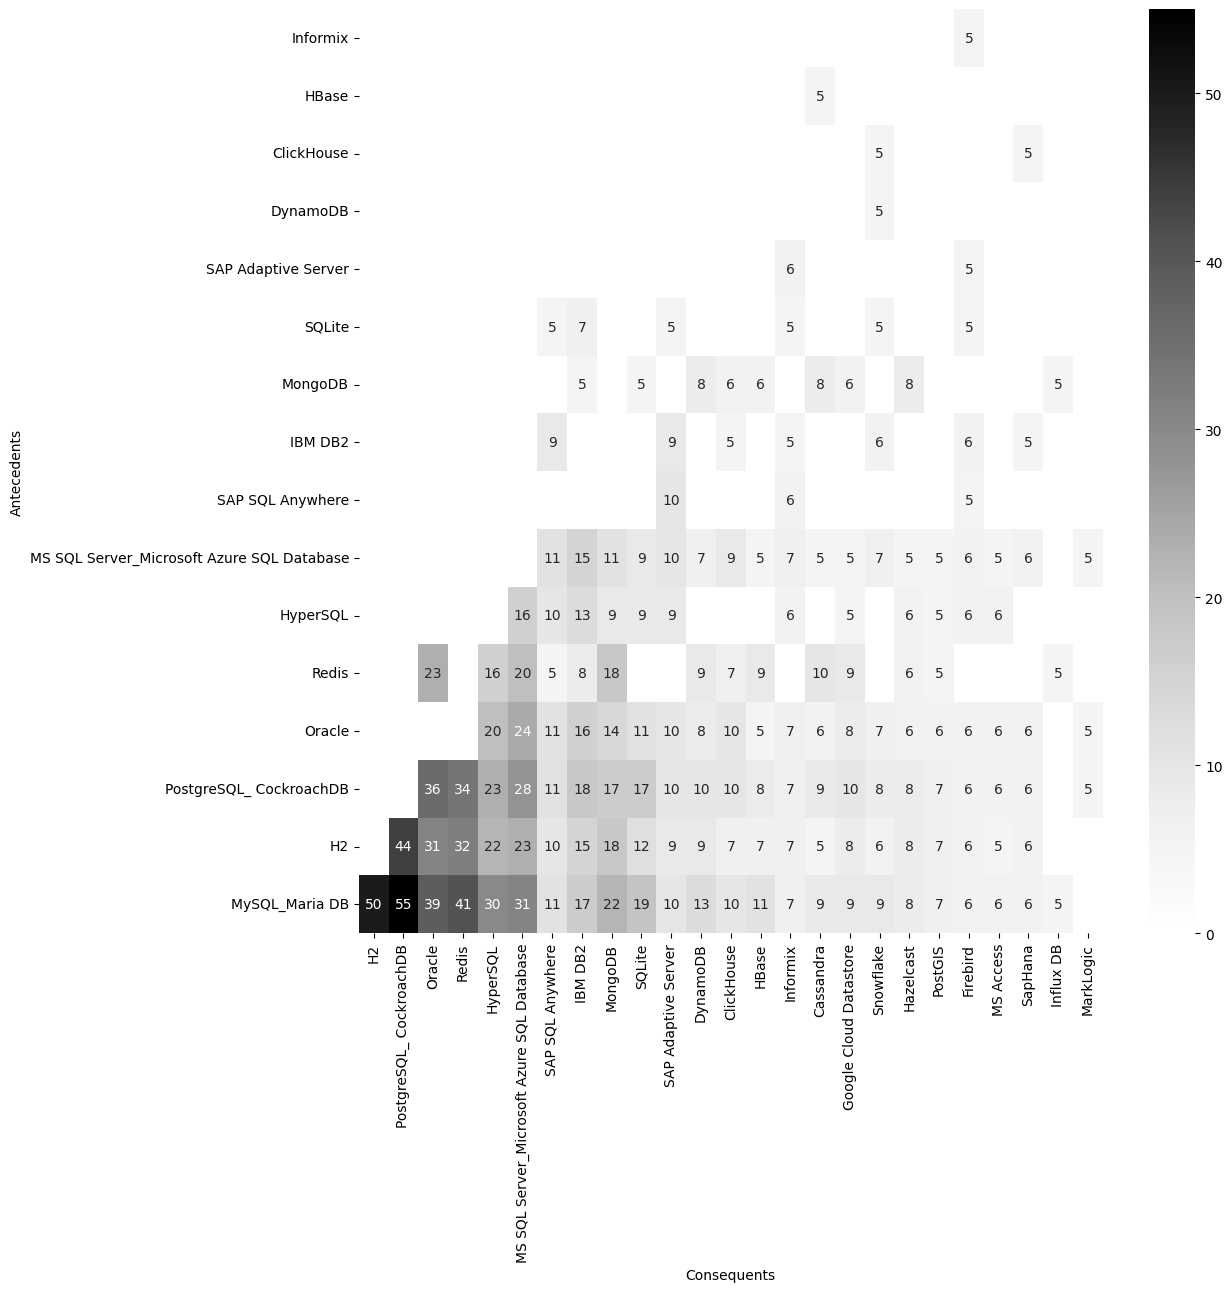

In [194]:
#Test sorting only by support, after the sort function
import seaborn as sns
pivot = orules1c.pivot(index='Antecedents', columns='Consequents', values='support_abs')
pivot = pivot.iloc[::-1]

#mask = np.triu(np.ones_like(pivot))

sns.heatmap(pivot, xticklabels=True, yticklabels=True, vmin=0, annot=True, cmap=sns.color_palette("Greys", as_cmap=True))

fig = plt.gcf()
fig.set_size_inches(12, 12)
plt.savefig(IMAGES_DIR+"/fig14.pdf", format="pdf", bbox_inches="tight")

Running the cells grouping by consequents and antecedents to identify the most used DBs together

In [195]:
rules1c = df2.groupby(['antecedents','consequents']).mean().sort_values(['support',], ascending=[False])

#sum().plot(kind='line')

#rules1c = rules1c[(rules1c['support'] >= 0.07)] 
rules1c

antecedent support  \
antecedents                                consequents                                                      
PostgreSQL_ CockroachDB                    MySQL_Maria DB                                        0.338462   
MySQL_Maria DB                             PostgreSQL_ CockroachDB                               0.435897   
                                           H2                                                    0.435897   
H2                                         MySQL_Maria DB                                        0.338462   
PostgreSQL_ CockroachDB                    H2                                                    0.338462   
...                                                                                                   ...   
MS SQL Server_Microsoft Azure SQL Database Cassandra                                             0.174359   
MS Access                                  MS SQL Server_Microsoft Azure SQL Database            0.030769   
                                           H2                                                    0.030769   
Informix                                   SQLite                                                0.035897   
Snowflake                                  SQLite                                                0.046154   

                                                                                       antecedent_sup_abs  \
antecedents                                consequents                                                      
PostgreSQL_ CockroachDB                    MySQL_Maria DB                                       66.676923   
MySQL_Maria DB                             PostgreSQL_ CockroachDB                              85.871795   
                                           H2                                                   85.871795   
H2                                         MySQL_Maria DB                                       66.676923   
PostgreSQL_ CockroachDB                    H2                                                   66.676923   
...                                                                                                   ...   
MS SQL Server_Microsoft Azure SQL Database Cassandra                                            34.348718   
MS Access                                  MS SQL Server_Microsoft Azure SQL Database            6.061538   
                                           H2                                                    6.061538   
Informix                                   SQLite                                                7.071795   
Snowflake                                  SQLite                                                9.092308   

                                                                                       consequent support  \
antecedents                                consequents                                                      
PostgreSQL_ CockroachDB                    MySQL_Maria DB                                        0.435897   
MySQL_Maria DB                             PostgreSQL_ CockroachDB                               0.338462   
                                           H2                                                    0.338462   
H2                                         MySQL_Maria DB                                        0.435897   
PostgreSQL_ CockroachDB                    H2                                                    0.338462   
...                                                                                                   ...   
MS SQL Server_Microsoft Azure SQL Database Cassandra                                             0.056410   
MS Access                                  MS SQL Server_Microsoft Azure SQL Database            0.174359   
                                           H2                                                    0.338462   
Informix                                   SQLite   

In [196]:
#rules1ca = rules1c.groupby(['consequents']).mean().sort_values(['consequent_sup_abs','support_abs'], ascending=[False,False])
rules1ca = rules1c.groupby(['consequents']).mean().sort_values(['support'], ascending=[False])
rules1ca

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
consequents,,,,,,,,,,,,
MySQL_Maria DB,0.114103,22.478205,0.435897,85.871795,0.092094,18.142521,0.867273,1.989627,0.042357,NaN,1.0,1.0
PostgreSQL_ CockroachDB,0.118162,23.277991,0.338462,66.676923,0.083974,16.542949,0.809107,2.390544,0.043981,NaN,1.0,1.0
Redis,0.147813,29.119155,0.302564,59.605128,0.077526,15.272700,0.591106,1.953654,0.032803,NaN,1.0,1.0
H2,0.122185,24.070457,0.338462,66.676923,0.077369,15.241695,0.705705,2.085037,0.036014,NaN,1.0,1.0
Oracle,0.121368,23.909402,0.261538,51.523077,0.068590,13.512179,0.703399,2.689468,0.036847,NaN,1.0,1.0
HyperSQL,0.153846,30.307692,0.194872,38.389744,0.063650,12.539065,0.570275,2.926410,0.033670,NaN,1.0,1.0
MS SQL Server_Microsoft Azure SQL Database,0.125000,24.625000,0.174359,34.348718,0.058761,11.575855,0.629360,3.609563,0.036966,NaN,1.0,1.0
MongoDB,0.169551,33.401603,0.143590,28.287179,0.053205,10.481410,0.414951,2.889840,0.028859,NaN,1.0,1.0
IBM DB2,0.164103,32.328205,0.092308,18.184615,0.050962,10.039423,0.488304,5.289964,0.035814,NaN,1.0,1.0


In [197]:
#rules1ca = rules1c.groupby('antecedents').mean().sort_values(['antecedent_sup_abs','support_abs'], ascending=[False,False])
rules1ca = rules1c.groupby('antecedents').mean().sort_values('support', ascending=False)
rules1ca

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,,,,,,,,,,,,
MySQL_Maria DB,0.435897,85.871795,0.114103,22.478205,0.092094,18.142521,0.211275,1.989627,0.042357,1.165216,1.0,1.0
PostgreSQL_ CockroachDB,0.338462,66.676923,0.118162,23.277991,0.083974,16.542949,0.248106,2.390544,0.043981,1.287619,1.0,1.0
Redis,0.302564,59.605128,0.147813,29.119155,0.077526,15.272700,0.256231,1.953654,0.032803,1.197552,1.0,1.0
H2,0.338462,66.676923,0.122185,24.070457,0.077369,15.241695,0.228590,2.085037,0.036014,1.209825,1.0,1.0
Oracle,0.261538,51.523077,0.121368,23.909402,0.068590,13.512179,0.262255,2.689468,0.036847,1.278236,1.0,1.0
HyperSQL,0.194872,38.389744,0.153846,30.307692,0.063650,12.539065,0.326625,2.926410,0.033670,1.352586,1.0,1.0
MS SQL Server_Microsoft Azure SQL Database,0.174359,34.348718,0.125000,24.625000,0.058761,11.575855,0.337010,3.609563,0.036966,1.654256,1.0,1.0
MongoDB,0.143590,28.287179,0.169551,33.401603,0.053205,10.481410,0.370536,2.889840,0.028859,1.434575,1.0,1.0
IBM DB2,0.092308,18.184615,0.164103,32.328205,0.050962,10.039423,0.552083,5.289964,0.035814,NaN,1.0,1.0


In [198]:
# To filter only the 10 most used in the current version
rules1cb = rules1ca[(rules1ca['support'] >= 0.05)] 
rules1cb

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,,,,,,,,,,,,
MySQL_Maria DB,0.435897,85.871795,0.114103,22.478205,0.092094,18.142521,0.211275,1.989627,0.042357,1.165216,1.0,1.0
PostgreSQL_ CockroachDB,0.338462,66.676923,0.118162,23.277991,0.083974,16.542949,0.248106,2.390544,0.043981,1.287619,1.0,1.0
Redis,0.302564,59.605128,0.147813,29.119155,0.077526,15.272700,0.256231,1.953654,0.032803,1.197552,1.0,1.0
H2,0.338462,66.676923,0.122185,24.070457,0.077369,15.241695,0.228590,2.085037,0.036014,1.209825,1.0,1.0
Oracle,0.261538,51.523077,0.121368,23.909402,0.068590,13.512179,0.262255,2.689468,0.036847,1.278236,1.0,1.0
HyperSQL,0.194872,38.389744,0.153846,30.307692,0.063650,12.539065,0.326625,2.926410,0.033670,1.352586,1.0,1.0
MS SQL Server_Microsoft Azure SQL Database,0.174359,34.348718,0.125000,24.625000,0.058761,11.575855,0.337010,3.609563,0.036966,1.654256,1.0,1.0
MongoDB,0.143590,28.287179,0.169551,33.401603,0.053205,10.481410,0.370536,2.889840,0.028859,1.434575,1.0,1.0
IBM DB2,0.092308,18.184615,0.164103,32.328205,0.050962,10.039423,0.552083,5.289964,0.035814,NaN,1.0,1.0


Identifying the antecedents and consequences that lead to the use of the 10 most used DBs

In [199]:
rules2 = df[ (df['consequents'].str.contains('MySQL')) &(df['confidence'] > 0.7)]
rules2

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
183,PostGIS,MySQL_Maria DB,0.035897,7.071795,0.435897,85.871795,0.035897,7.071795,1.000000,2.294118,0.020250,inf,1,1
184,ClickHouse,MySQL_Maria DB,0.051282,10.102564,0.435897,85.871795,0.051282,10.102564,1.000000,2.294118,0.028928,inf,1,1
185,Influx DB,MySQL_Maria DB,0.025641,5.051282,0.435897,85.871795,0.025641,5.051282,1.000000,2.294118,0.014464,inf,1,1
187,SapHana,MySQL_Maria DB,0.030769,6.061538,0.435897,85.871795,0.030769,6.061538,1.000000,2.294118,0.017357,inf,1,1
188,Firebird,MySQL_Maria DB,0.030769,6.061538,0.435897,85.871795,0.030769,6.061538,1.000000,2.294118,0.017357,inf,1,1
190,Informix,MySQL_Maria DB,0.035897,7.071795,0.435897,85.871795,0.035897,7.071795,1.000000,2.294118,0.020250,inf,1,1
194,Snowflake,MySQL_Maria DB,0.046154,9.092308,0.435897,85.871795,0.046154,9.092308,1.000000,2.294118,0.026036,inf,1,1
195,SAP SQL Anywhere,MySQL_Maria DB,0.056410,11.112821,0.435897,85.871795,0.056410,11.112821,1.000000,2.294118,0.031821,inf,1,1
197,MS Access,MySQL_Maria DB,0.030769,6.061538,0.435897,85.871795,0.030769,6.061538,1.000000,2.294118,0.017357,inf,1,1
199,SAP Adaptive Server,MySQL_Maria DB,0.051282,10.102564,0.435897,85.871795,0.051282,10.102564,1.000000,2.294118,0.028928,inf,1,1


In [200]:
rules3 = df[(df['consequents'].str.contains('PostgreSQL')) | (df['antecedents'].str.contains('PostgreSQL'))] #(df['confidence'] > 0.7) ]
rules3

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
118,MS Access,PostgreSQL_ CockroachDB,0.030769,6.061538,0.338462,66.676923,0.030769,6.061538,1.000000,2.954545,0.020355,inf,1,1
119,PostgreSQL_ CockroachDB,MS Access,0.338462,66.676923,0.030769,6.061538,0.030769,6.061538,0.090909,2.954545,0.020355,1.066154,1,1
120,SAP SQL Anywhere,PostgreSQL_ CockroachDB,0.056410,11.112821,0.338462,66.676923,0.056410,11.112821,1.000000,2.954545,0.037318,inf,1,1
121,SAP Adaptive Server,PostgreSQL_ CockroachDB,0.051282,10.102564,0.338462,66.676923,0.051282,10.102564,1.000000,2.954545,0.033925,inf,1,1
122,PostgreSQL_ CockroachDB,PostGIS,0.338462,66.676923,0.035897,7.071795,0.035897,7.071795,0.106061,2.954545,0.023748,1.078488,1,1
123,PostGIS,PostgreSQL_ CockroachDB,0.035897,7.071795,0.338462,66.676923,0.035897,7.071795,1.000000,2.954545,0.023748,inf,1,1
124,ClickHouse,PostgreSQL_ CockroachDB,0.051282,10.102564,0.338462,66.676923,0.051282,10.102564,1.000000,2.954545,0.033925,inf,1,1
125,Informix,PostgreSQL_ CockroachDB,0.035897,7.071795,0.338462,66.676923,0.035897,7.071795,1.000000,2.954545,0.023748,inf,1,1
126,PostgreSQL_ CockroachDB,Informix,0.338462,66.676923,0.035897,7.071795,0.035897,7.071795,0.106061,2.954545,0.023748,1.078488,1,1
127,PostgreSQL_ CockroachDB,Firebird,0.338462,66.676923,0.030769,6.061538,0.030769,6.061538,0.090909,2.954545,0.020355,1.066154,1,1


In [201]:
rules4 = df[(df['consequents'].str.contains('H2')) & (df['confidence'] > 0.7) ]
rules4

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
134,PostGIS,H2,0.035897,7.071795,0.338462,66.676923,0.035897,7.071795,1.000000,2.954545,0.023748,inf,1,1
135,Informix,H2,0.035897,7.071795,0.338462,66.676923,0.035897,7.071795,1.000000,2.954545,0.023748,inf,1,1
138,Firebird,H2,0.030769,6.061538,0.338462,66.676923,0.030769,6.061538,1.000000,2.954545,0.020355,inf,1,1
140,SapHana,H2,0.030769,6.061538,0.338462,66.676923,0.030769,6.061538,1.000000,2.954545,0.020355,inf,1,1
151,SAP SQL Anywhere,H2,0.056410,11.112821,0.338462,66.676923,0.051282,10.102564,0.909091,2.685950,0.032189,7.276923,1,1
153,SAP Adaptive Server,H2,0.051282,10.102564,0.338462,66.676923,0.046154,9.092308,0.900000,2.659091,0.028797,6.615385,1,1
160,MS Access,H2,0.030769,6.061538,0.338462,66.676923,0.025641,5.051282,0.833333,2.462121,0.015227,3.969231,1,1
161,IBM DB2,H2,0.092308,18.184615,0.338462,66.676923,0.076923,15.153846,0.833333,2.462121,0.045680,3.969231,1,1


In [202]:
rules5 = df[(df['consequents'].str.contains('Oracle')) & (df['confidence'] > 0.7) ]
rules5

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
81,ClickHouse,Oracle,0.051282,10.102564,0.261538,51.523077,0.051282,10.102564,1.000000,3.823529,0.037870,inf,1,1
82,SAP Adaptive Server,Oracle,0.051282,10.102564,0.261538,51.523077,0.051282,10.102564,1.000000,3.823529,0.037870,inf,1,1
85,MS Access,Oracle,0.030769,6.061538,0.261538,51.523077,0.030769,6.061538,1.000000,3.823529,0.022722,inf,1,1
86,SAP SQL Anywhere,Oracle,0.056410,11.112821,0.261538,51.523077,0.056410,11.112821,1.000000,3.823529,0.041657,inf,1,1
89,Informix,Oracle,0.035897,7.071795,0.261538,51.523077,0.035897,7.071795,1.000000,3.823529,0.026509,inf,1,1
91,Firebird,Oracle,0.030769,6.061538,0.261538,51.523077,0.030769,6.061538,1.000000,3.823529,0.022722,inf,1,1
93,SapHana,Oracle,0.030769,6.061538,0.261538,51.523077,0.030769,6.061538,1.000000,3.823529,0.022722,inf,1,1
94,MarkLogic,Oracle,0.025641,5.051282,0.261538,51.523077,0.025641,5.051282,1.000000,3.823529,0.018935,inf,1,1
107,IBM DB2,Oracle,0.092308,18.184615,0.261538,51.523077,0.082051,16.164103,0.888889,3.398693,0.057909,6.646154,1,1
111,PostGIS,Oracle,0.035897,7.071795,0.261538,51.523077,0.030769,6.061538,0.857143,3.277311,0.021381,5.169231,1,1


In [203]:
rules6 = df[(df['consequents'].str.contains('Ehcache'))]# & (df['confidence'] > 0.7) ]
rules6


,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [204]:
rules7 = df[ (df['consequents'].str.contains('Redis')) ] #& (df['confidence'] > 0.7)]
rules7

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
108,Influx DB,Redis,0.025641,5.051282,0.302564,59.605128,0.025641,5.051282,1.000000,3.305085,0.017883,inf,1,1
114,Cassandra,Redis,0.056410,11.112821,0.302564,59.605128,0.051282,10.102564,0.909091,3.004622,0.034214,7.671795,1,1
158,HBase,Redis,0.061538,12.123077,0.302564,59.605128,0.046154,9.092308,0.750000,2.478814,0.027535,2.789744,1,1
176,PostGIS,Redis,0.035897,7.071795,0.302564,59.605128,0.025641,5.051282,0.714286,2.360775,0.014780,2.441026,1,1
179,ClickHouse,Redis,0.051282,10.102564,0.302564,59.605128,0.035897,7.071795,0.700000,2.313559,0.020381,2.324786,1,1
209,MongoDB,Redis,0.143590,28.287179,0.302564,59.605128,0.092308,18.184615,0.642857,2.124697,0.048863,1.952821,1,1
232,MS SQL Server_Microsoft Azure SQL Database,Redis,0.174359,34.348718,0.302564,59.605128,0.102564,20.205128,0.588235,1.944167,0.049809,1.693773,1,1
268,Google Cloud Datastore,Redis,0.087179,17.174359,0.302564,59.605128,0.046154,9.092308,0.529412,1.749751,0.019776,1.482051,1,1
278,PostgreSQL_ CockroachDB,Redis,0.338462,66.676923,0.302564,59.605128,0.174359,34.348718,0.515152,1.702619,0.071953,1.438462,1,1
289,DynamoDB,Redis,0.092308,18.184615,0.302564,59.605128,0.046154,9.092308,0.500000,1.652542,0.018225,1.394872,1,1


In [205]:
rules8 = df[ (df['consequents'].str.contains('SQLite')) & (df['confidence'] > 0.7) ]
rules8

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
32,Firebird,SQLite,0.030769,6.061538,0.133333,26.266667,0.025641,5.051282,0.833333,6.250000,0.021538,5.200000,1,1
50,Informix,SQLite,0.035897,7.071795,0.133333,26.266667,0.025641,5.051282,0.714286,5.357143,0.020855,3.033333,1,1


In [206]:
rules9 = df[(df['consequents'].str.contains('MongoDB')) & (df['confidence'] > 0.7) ]
rules9

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
31,Influx DB,MongoDB,0.025641,5.051282,0.14359,28.287179,0.025641,5.051282,1.000000,6.964286,0.021959,inf,1,1
59,Cassandra,MongoDB,0.056410,11.112821,0.14359,28.287179,0.041026,8.082051,0.727273,5.064935,0.032926,3.140171,1,1


In [207]:
rules10 = df[ (df['consequents'].str.contains('MS SQL Server')) & (df['confidence'] > 0.7) ]
rules10

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
38,Informix,MS SQL Server_Microsoft Azure SQL Database,0.035897,7.071795,0.174359,34.348718,0.035897,7.071795,1.000000,5.735294,0.029638,inf,1,1
39,SAP SQL Anywhere,MS SQL Server_Microsoft Azure SQL Database,0.056410,11.112821,0.174359,34.348718,0.056410,11.112821,1.000000,5.735294,0.046575,inf,1,1
42,SAP Adaptive Server,MS SQL Server_Microsoft Azure SQL Database,0.051282,10.102564,0.174359,34.348718,0.051282,10.102564,1.000000,5.735294,0.042341,inf,1,1
43,MarkLogic,MS SQL Server_Microsoft Azure SQL Database,0.025641,5.051282,0.174359,34.348718,0.025641,5.051282,1.000000,5.735294,0.021170,inf,1,1
46,SapHana,MS SQL Server_Microsoft Azure SQL Database,0.030769,6.061538,0.174359,34.348718,0.030769,6.061538,1.000000,5.735294,0.025404,inf,1,1
47,Firebird,MS SQL Server_Microsoft Azure SQL Database,0.030769,6.061538,0.174359,34.348718,0.030769,6.061538,1.000000,5.735294,0.025404,inf,1,1
52,ClickHouse,MS SQL Server_Microsoft Azure SQL Database,0.051282,10.102564,0.174359,34.348718,0.046154,9.092308,0.900000,5.161765,0.037212,8.256410,1,1
60,IBM DB2,MS SQL Server_Microsoft Azure SQL Database,0.092308,18.184615,0.174359,34.348718,0.076923,15.153846,0.833333,4.779412,0.060828,4.953846,1,1
62,MS Access,MS SQL Server_Microsoft Azure SQL Database,0.030769,6.061538,0.174359,34.348718,0.025641,5.051282,0.833333,4.779412,0.020276,4.953846,1,1
68,Snowflake,MS SQL Server_Microsoft Azure SQL Database,0.046154,9.092308,0.174359,34.348718,0.035897,7.071795,0.777778,4.460784,0.027850,3.715385,1,1


In [208]:
rules11 = df[ (df['consequents'] .str.contains('MySQL')) & (df['antecedents'] .str.contains('MariaDB'))|
             (df['antecedents'] .str.contains('MySQL')) & (df['consequents'] .str.contains('MariaDB'))] #& (df['confidence'] > 0.7) ]
rules11

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


Expected Patterns Session
In the rules below, we highlight the dependence presented in opposite directions and the expected correlation.

In [209]:
rules9 = df[((df['antecedents'].str.contains('MariaDB')) & (df['consequents'].str.contains('MySQL'))) | 
((df['antecedents'].str.contains('MySQL')) & (df['consequents'].str.contains('MariaDB')))]
rules9

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [210]:
rules10 = df2[((df2['antecedents'].str.contains('PostgreSQL')) & (df2['consequents'].str.contains('PostGIS'))) | 
((df2['antecedents'].str.contains('PostGIS')) & (df2['consequents'].str.contains('PostgreSQL')))]
rules10

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
122,PostgreSQL_ CockroachDB,PostGIS,0.338462,66.676923,0.035897,7.071795,0.035897,7.071795,0.106061,2.954545,0.023748,1.078488,1,1
123,PostGIS,PostgreSQL_ CockroachDB,0.035897,7.071795,0.338462,66.676923,0.035897,7.071795,1.000000,2.954545,0.023748,inf,1,1


In [211]:
rules11a = df[ (df['consequents'] .str.contains('MySQL')) & (df['antecedents'] .str.contains('MariaDB'))|
             (df['antecedents'] .str.contains('MySQL')) & (df['consequents'] .str.contains('MariaDB'))] #& (df['confidence'] > 0.7) ]
rules11a

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [212]:
rules12a = df[ (df['consequents'] .str.contains('PostgreSQL')) & (df['antecedents'] .str.contains('PostGIS'))|
             (df['antecedents'] .str.contains('PostgreSQL')) & (df['consequents'] .str.contains('PostGIS'))] #& (df['confidence'] > 0.7) ]
rules12a

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
122,PostgreSQL_ CockroachDB,PostGIS,0.338462,66.676923,0.035897,7.071795,0.035897,7.071795,0.106061,2.954545,0.023748,1.078488,1,1
123,PostGIS,PostgreSQL_ CockroachDB,0.035897,7.071795,0.338462,66.676923,0.035897,7.071795,1.000000,2.954545,0.023748,inf,1,1


Unexpected Patterns Session
In the rules below we highlight competition and high lift values.

In [213]:
rules12 = df2[(df2['lift'] > 10)] #>20
rules12

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Firebird,Informix,0.030769,6.061538,0.035897,7.071795,0.025641,5.051282,0.833333,23.214286,0.024536,5.784615,1,1
1,Informix,Firebird,0.035897,7.071795,0.030769,6.061538,0.025641,5.051282,0.714286,23.214286,0.024536,3.392308,1,1
2,SAP SQL Anywhere,SAP Adaptive Server,0.056410,11.112821,0.051282,10.102564,0.051282,10.102564,0.909091,17.727273,0.048389,10.435897,1,1
3,SAP Adaptive Server,SAP SQL Anywhere,0.051282,10.102564,0.056410,11.112821,0.051282,10.102564,1.000000,17.727273,0.048389,inf,1,1
4,SAP Adaptive Server,Informix,0.051282,10.102564,0.035897,7.071795,0.030769,6.061538,0.600000,16.714286,0.028928,2.410256,1,1
5,Informix,SAP Adaptive Server,0.035897,7.071795,0.051282,10.102564,0.030769,6.061538,0.857143,16.714286,0.028928,6.641026,1,1
6,SAP Adaptive Server,Firebird,0.051282,10.102564,0.030769,6.061538,0.025641,5.051282,0.500000,16.250000,0.024063,1.938462,1,1
7,Firebird,SAP Adaptive Server,0.030769,6.061538,0.051282,10.102564,0.025641,5.051282,0.833333,16.250000,0.024063,5.692308,1,1
8,ClickHouse,SapHana,0.051282,10.102564,0.030769,6.061538,0.025641,5.051282,0.500000,16.250000,0.024063,1.938462,1,1
9,SapHana,ClickHouse,0.030769,6.061538,0.051282,10.102564,0.025641,5.051282,0.833333,16.250000,0.024063,5.692308,1,1


In [214]:
#if you need to generate the rules in excel
#rules_filter = df2.to_excel('historical_filters.xlsx', index=False)

In [215]:
rules14 = df2[(df2['confidence'] > 0.9)] #>20(['support_abs'], ascending=[False])
rules14 = rules14.sort_values(['lift'], ascending=False)
rules14

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
2,SAP SQL Anywhere,SAP Adaptive Server,0.056410,11.112821,0.051282,10.102564,0.051282,10.102564,0.909091,17.727273,0.048389,10.435897,1,1
3,SAP Adaptive Server,SAP SQL Anywhere,0.051282,10.102564,0.056410,11.112821,0.051282,10.102564,1.000000,17.727273,0.048389,inf,1,1
14,Firebird,IBM DB2,0.030769,6.061538,0.092308,18.184615,0.030769,6.061538,1.000000,10.833333,0.027929,inf,1,1
18,SAP Adaptive Server,IBM DB2,0.051282,10.102564,0.092308,18.184615,0.046154,9.092308,0.900000,9.750000,0.041420,9.076923,1,1
31,Influx DB,MongoDB,0.025641,5.051282,0.143590,28.287179,0.025641,5.051282,1.000000,6.964286,0.021959,inf,1,1
43,MarkLogic,MS SQL Server_Microsoft Azure SQL Database,0.025641,5.051282,0.174359,34.348718,0.025641,5.051282,1.000000,5.735294,0.021170,inf,1,1
46,SapHana,MS SQL Server_Microsoft Azure SQL Database,0.030769,6.061538,0.174359,34.348718,0.030769,6.061538,1.000000,5.735294,0.025404,inf,1,1
47,Firebird,MS SQL Server_Microsoft Azure SQL Database,0.030769,6.061538,0.174359,34.348718,0.030769,6.061538,1.000000,5.735294,0.025404,inf,1,1
42,SAP Adaptive Server,MS SQL Server_Microsoft Azure SQL Database,0.051282,10.102564,0.174359,34.348718,0.051282,10.102564,1.000000,5.735294,0.042341,inf,1,1
39,SAP SQL Anywhere,MS SQL Server_Microsoft Azure SQL Database,0.056410,11.112821,0.174359,34.348718,0.056410,11.112821,1.000000,5.735294,0.046575,inf,1,1


In [216]:
rules15 = df2[(df2['lift'] > 8)] #& (df2['confidence'] > 0.5)] #>20(['support_abs'], ascending=[False])
rules15 = rules15.sort_values(['lift'], ascending=False)
rules15

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Firebird,Informix,0.030769,6.061538,0.035897,7.071795,0.025641,5.051282,0.833333,23.214286,0.024536,5.784615,1,1
1,Informix,Firebird,0.035897,7.071795,0.030769,6.061538,0.025641,5.051282,0.714286,23.214286,0.024536,3.392308,1,1
2,SAP SQL Anywhere,SAP Adaptive Server,0.056410,11.112821,0.051282,10.102564,0.051282,10.102564,0.909091,17.727273,0.048389,10.435897,1,1
3,SAP Adaptive Server,SAP SQL Anywhere,0.051282,10.102564,0.056410,11.112821,0.051282,10.102564,1.000000,17.727273,0.048389,inf,1,1
4,SAP Adaptive Server,Informix,0.051282,10.102564,0.035897,7.071795,0.030769,6.061538,0.600000,16.714286,0.028928,2.410256,1,1
5,Informix,SAP Adaptive Server,0.035897,7.071795,0.051282,10.102564,0.030769,6.061538,0.857143,16.714286,0.028928,6.641026,1,1
6,SAP Adaptive Server,Firebird,0.051282,10.102564,0.030769,6.061538,0.025641,5.051282,0.500000,16.250000,0.024063,1.938462,1,1
7,Firebird,SAP Adaptive Server,0.030769,6.061538,0.051282,10.102564,0.025641,5.051282,0.833333,16.250000,0.024063,5.692308,1,1
8,ClickHouse,SapHana,0.051282,10.102564,0.030769,6.061538,0.025641,5.051282,0.500000,16.250000,0.024063,1.938462,1,1
9,SapHana,ClickHouse,0.030769,6.061538,0.051282,10.102564,0.025641,5.051282,0.833333,16.250000,0.024063,5.692308,1,1


In [217]:
#rules15_filter = rules15.to_excel('rules_filters_liftv10.xlsx', index=False)